##### Deposit

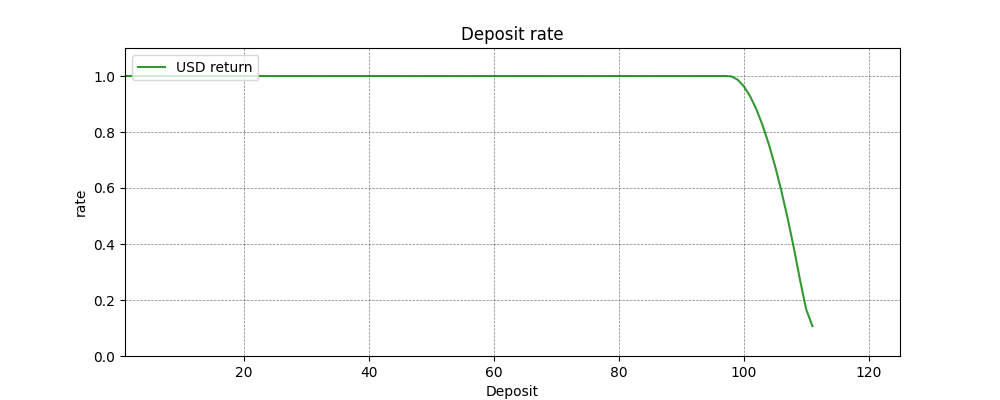

In [1]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0)
pool.proportional_deposit(1000, state)

%matplotlib widget
deposits = list(range(1, 112, 1))

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(deposits, 
                list(map(
                    lambda amount: pool.deposit([0, 0, amount, 0], deepcopy(state)) / amount, deposits
                )), 
                color='green', 
                label='USD return', 
                alpha=0.8
               )
ax.legend(loc='upper left')
ax.set_title('Deposit rate')
ax.set_ylabel('rate')
ax.set_xlabel('Deposit')
ax.set_ylim(ymin=0, ymax=1.1)
ax.set_xlim(xmin=1, xmax=125)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()

PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[4500.0, 1500.0, 2099.0, 3000.0], assets_total_supply=11099.0, total_supply=10188.379999999996)
PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[4500.0, 1500.0, 1000.0, 3000.0], assets_total_supply=10000.0, total_supply=10000.0)


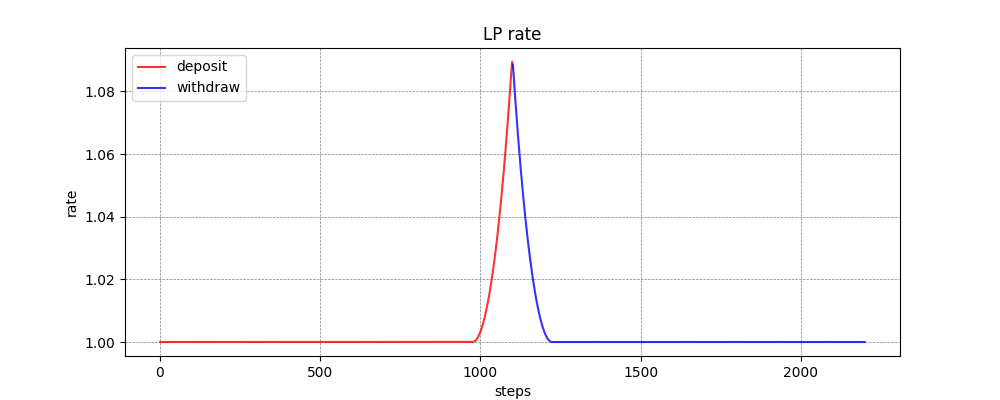

In [2]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0)
pool.proportional_deposit(10000, state)

%matplotlib widget
deposits = list(range(1, 1100, 1))

def deposit_rate(amounts: [int], state: pool.PoolState):
    a = pool.deposit(amounts, state)
    return state.assets_total_supply / state.total_supply

def withdraw_rate(amounts: [int], state: pool.PoolState):
    a = pool.withdraw(amounts, state)
    return state.assets_total_supply / state.total_supply

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(deposits, 
                list(map(
                    lambda amount: deposit_rate([0, 0, 1, 0], state), deposits
                )),
                color='red', 
                label='deposit', 
                alpha=0.8
               )
print(state)
ax.plot(list(map(lambda i: i + 1100, deposits)), 
                list(map(
                    lambda amount: withdraw_rate([0, 0, 1, 0], state), deposits
                )),
                color='blue', 
                label='withdraw', 
                alpha=0.8
               )
print(state)
ax.legend(loc='upper left')
ax.set_title('LP rate')
ax.set_ylabel('rate')
ax.set_xlabel('steps')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()

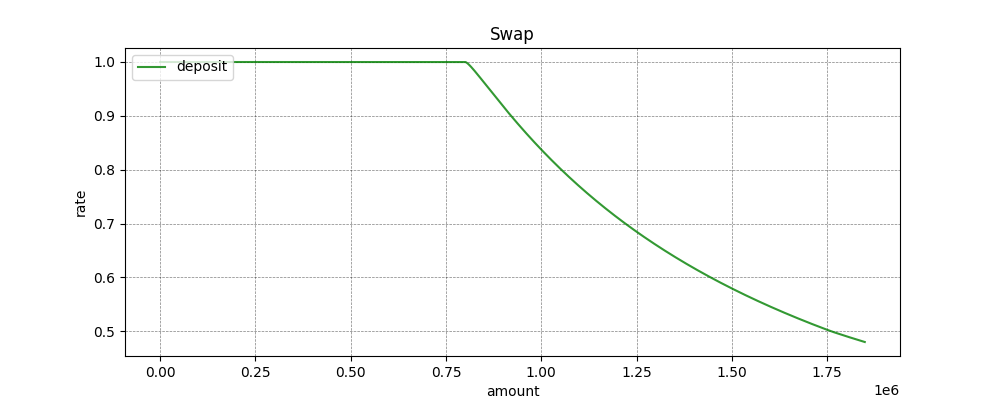

In [3]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0)
pool.proportional_deposit(10000000, state)

%matplotlib widget
deposits = list(range(1, 1850000, 1000))

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(deposits, 
                list(map(
                    lambda amount: pool.swap_bisection(0, 2, amount, deepcopy(state))[0] / (amount), deposits
                )),
                color='green', 
                label='deposit', 
                alpha=0.8
               )
ax.legend(loc='upper left')
ax.set_title('Swap')
ax.set_ylabel('rate')
ax.set_xlabel('amount')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()

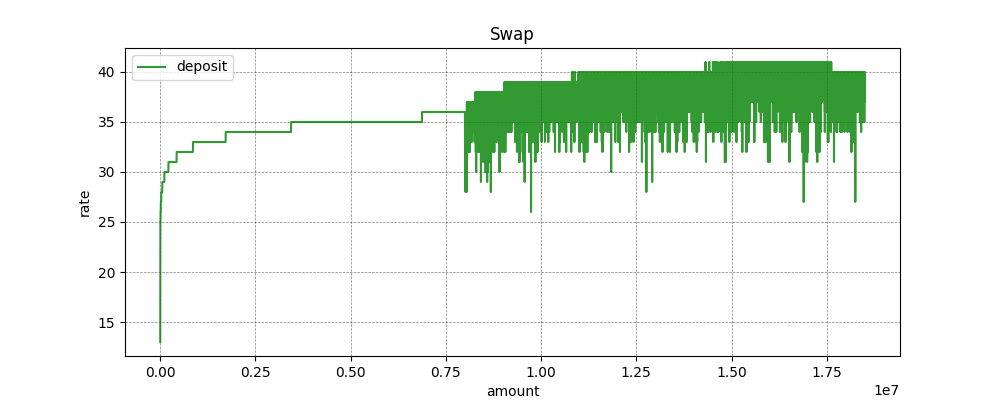

In [4]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0)
pool.proportional_deposit(100000000, state)

%matplotlib widget
deposits = list(range(1, 18500000, 1000))

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(deposits, 
                list(map(
                    lambda amount: pool.swap_bisection(0, 2, amount, deepcopy(state))[1], deposits  
                )),
                color='green', 
                label='deposit', 
                alpha=0.8
               )
ax.legend(loc='upper left')
ax.set_title('Swap')
ax.set_ylabel('rate')
ax.set_xlabel('amount')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()

In [5]:
import pool
import importlib
from copy import deepcopy
importlib.reload(pool)

weights = [0.5, 0.5]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0)
pool.proportional_deposit(100, state)
print(state)
print(pool.swap_bisection(0, 1, 45, state))
print(state)
print(pool.swap_bisection(1, 0, 45, state))
print(state)

PoolState(weights=[0.5, 0.5], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[50.0, 50.0], assets_total_supply=100.0, total_supply=100)
(40.630788803100586, 18)
PoolState(weights=[0.5, 0.5], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[95.0, 9.369211196899414], assets_total_supply=104.36921119689941, total_supply=100)
(49.36902759564059, 18)
PoolState(weights=[0.5, 0.5], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[45.63097240435941, 54.369211196899414], assets_total_supply=100.00018360125883, total_supply=100)


In [6]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0)
pool.proportional_deposit(90000000, state)

print(state, pool.calculate_util_func(state))
result = pool.deposit([16500000,0,0,0], state)
print(result, state, pool.calculate_util_func(state))
result1 = pool.withdraw_bisection(2, result, state)
print(result1, state, pool.calculate_util_func(state))

PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[40500000.0, 13500000.0, 9000000.0, 27000000.0], assets_total_supply=90000000.0, total_supply=90000000) [90000000.0, 90000000]
16499999.999999998 PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[57000000.0, 13500000.0, 9000000.0, 27000000.0], assets_total_supply=106500000.0, total_supply=106500000.0) [106500000.0, 106500000.0]
(7976578.411398804, 34) PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[57000000.0, 13500000.0, 1023421.5886011962, 27000000.0], assets_total_supply=98523421.5886012, total_supply=90000000.0) [90000000.00006375, 90000000.0]


In [7]:
import pool
import importlib
from copy import deepcopy
import matplotlib.pyplot as plt
importlib.reload(pool)

# USDT: [ETH, BSC, POLY, TRON]
weights = [0.45, 0.15, 0.1, 0.3]
state = pool.create(weights=weights, max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0)
pool.proportional_deposit(90000000, state)

print(state, pool.calculate_util_func(state))
result = pool.swap_bisection(0, 2, 16500000, state)[0]
print(result, state, pool.calculate_util_func(state))
result1 = pool.swap_bisection(2, 0, result, state)[0]
print(result1, state, pool.calculate_util_func(state))

PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[40500000.0, 13500000.0, 9000000.0, 27000000.0], assets_total_supply=90000000.0, total_supply=90000000) [90000000.0, 90000000]
7976578.411398805 PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[57000000.0, 13500000.0, 1023421.5886011953, 27000000.0], assets_total_supply=98523421.5886012, total_supply=90000000) [90000000.00006375, 90000000]
16499999.999876235 PoolState(weights=[0.45, 0.15, 0.1, 0.3], max_allocation=0.9, weight_amplitude=0.8, slippage_rate=100, fee_max=9, fee_base=0, assets_balances=[40500000.00012377, 13500000.0, 9000000.0, 27000000.0], assets_total_supply=90000000.00012377, total_supply=90000000) [90000000.00012377, 90000000]


In [8]:
import pool
import importlib
from copy import deepcopy
importlib.reload(pool)

weights = [0.5, 0.5]
state = pool.create(weights=weights, max_allocation=0.75, weight_amplitude=0.5, slippage_rate=1, fee_max=0.5, fee_base=0)
pool.proportional_deposit(100, state)
state.weights = [0.4, 0.4, 0.2]
append_amount = state.assets_total_supply * 0.2 / 0.8
state.assets_total_supply += append_amount
state.assets_balances.append(append_amount)
print(pool.calculate_fee(state))
print(state)
print(pool.swap_bisection(1, 0, 10, state))
print(state)
print(pool.swap_bisection(0, 1, 10, state))
print(state)

0
PoolState(weights=[0.4, 0.4, 0.2], max_allocation=0.75, weight_amplitude=0.5, slippage_rate=1, fee_max=0.5, fee_base=0, assets_balances=[50.0, 50.0, 25.0], assets_total_supply=125.0, total_supply=100)
(9.999923706054688, 16)
PoolState(weights=[0.4, 0.4, 0.2], max_allocation=0.75, weight_amplitude=0.5, slippage_rate=1, fee_max=0.5, fee_base=0, assets_balances=[40.00007629394531, 60.0, 25.0], assets_total_supply=125.00007629394531, total_supply=100)
(9.999923706054688, 16)
PoolState(weights=[0.4, 0.4, 0.2], max_allocation=0.75, weight_amplitude=0.5, slippage_rate=1, fee_max=0.5, fee_base=0, assets_balances=[50.00007629394531, 50.00007629394531, 25.0], assets_total_supply=125.00015258789062, total_supply=100)
